# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Import dataset
visa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# duplicate data to avoid changes to original data
df = visa.copy()

<IPython.core.display.Javascript object>

In [4]:
# checking shape of data
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 25480 rows and 12 columns.


<IPython.core.display.Javascript object>

In [5]:
# let's view top 5 rows of the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
# let's view last 5 rows of the data
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

- The `no_of_employees` and `yr_of_estab` variables are of integer data types, the `prevailing_wage` variable is a float data type while the rest of the variables are of object data types

In [8]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicates in the dataset

In [9]:
# checking for missing values in the data.
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
# check statstical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

   - The minimum value for the `no_of_employees` column shows negative

In [11]:
# check number of rows with negative number of employees
df[df["no_of_employees"] < 0].case_id.count()

33

<IPython.core.display.Javascript object>

In [12]:
# view 5 rows of the dataset with negative number of employees
df[df["no_of_employees"] < 0].head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied


<IPython.core.display.Javascript object>

In [13]:
# take absolute values of the number of employees to convert to positive numbers
df["no_of_employees"] = abs(df["no_of_employees"])

<IPython.core.display.Javascript object>

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

- The negative values have all been converted to positive values

In [15]:
# checking number of categories in categorical column
cat_cols = list(df.select_dtypes("object").columns)

for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 30)

EZYV22208    1
EZYV23452    1
EZYV2153     1
EZYV12683    1
EZYV13562    1
            ..
EZYV19825    1
EZYV20512    1
EZYV6557     1
EZYV18118    1
EZYV1311     1
Name: case_id, Length: 25480, dtype: int64
------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------------------------
Year     22962
Hour      2157
Week       272
Month      

<IPython.core.display.Javascript object>

In [16]:
# drop the case_id column since it will not be used in the model
df.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Plot of number of employes

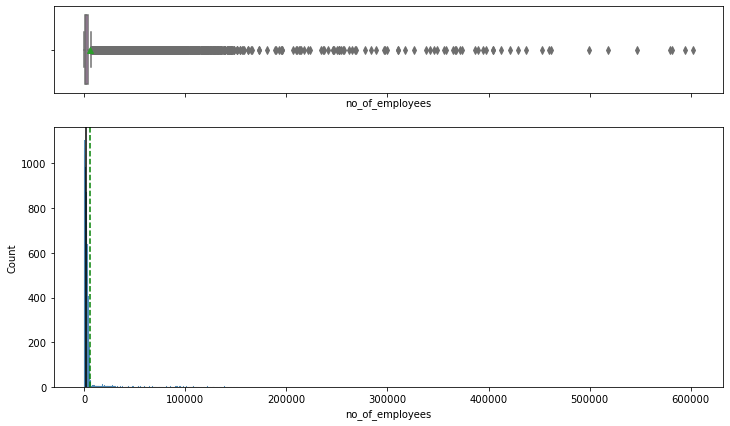

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "no_of_employees")

- The distribution is right skewed and has outliers

#### Plot of prevailing wage

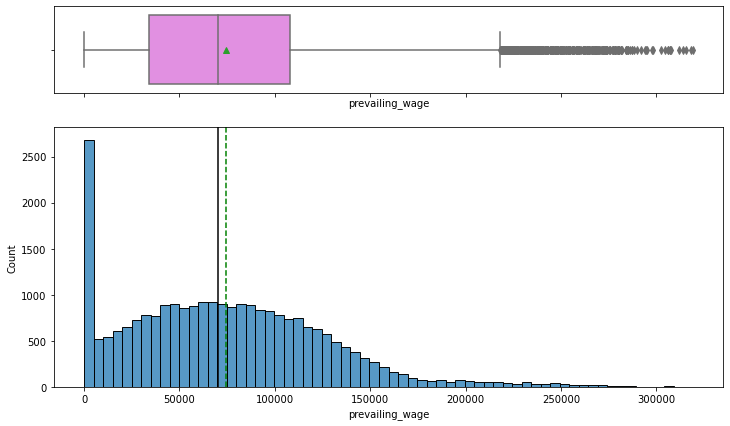

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "prevailing_wage")

- The distribution is right skewed and has outliers

In [20]:
df.loc[df["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


<IPython.core.display.Javascript object>

In [21]:
df.loc[df["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

- There are 176 rows of data where prevailing wage is less than 100 but they are all hourly wages which makes sense

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Barplot of continent

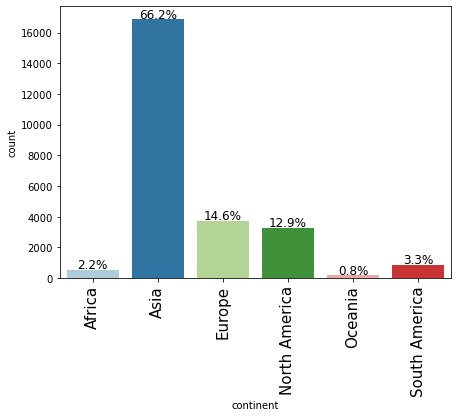

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "continent", perc=True)

- Majority (66.2%) of the employees are from Asia followed by Europe and North America, Oceania has the least percentage (0.8%) of employees

#### Barplot of education of employee

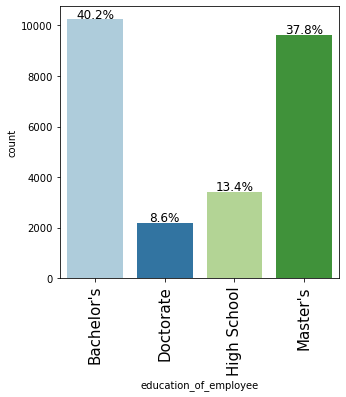

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "education_of_employee", perc=True)

- Almost 80% of the employess either have Bachelors or Masters degreees

#### Barplot of job experience

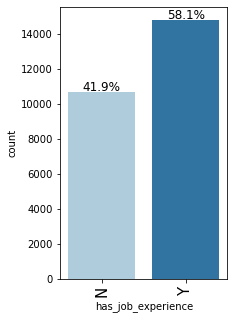

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "has_job_experience", perc=True)

- 58% of the employess have prior job experience 

#### Barplot of job training

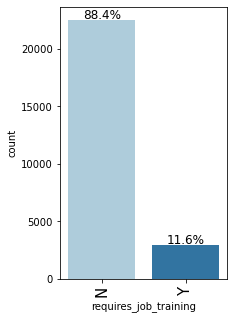

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "requires_job_training", perc=True)

- Almost 90% of the employees do not require job traning, this make sense since the same percentage are very educated and more than half of all the employess have previous job experience

#### Barplot of region of employment

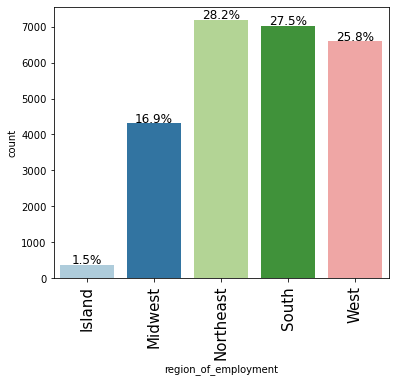

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "region_of_employment", perc=True)

- Very small number of the applicants are from the Island (1.5%) and the percetange of employees from the midwest are lower compared to Northeast, South and West 

#### Barplot of unit of wage

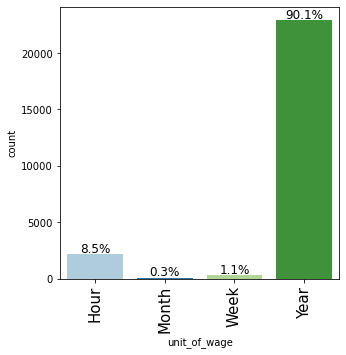

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "unit_of_wage", perc=True)

- 90% of the employees are paid annually, 8.5% are paid hourly and the rest ae paid either weekly or monthly

#### Barplot of education of case status

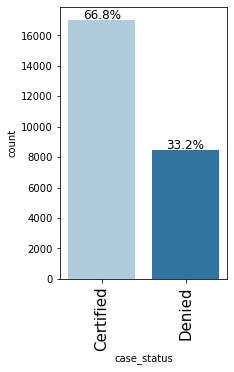

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "case_status", perc=True)

- Two-thirds of the visa cases are certified while the rest are denied

## Bivarate Analysis

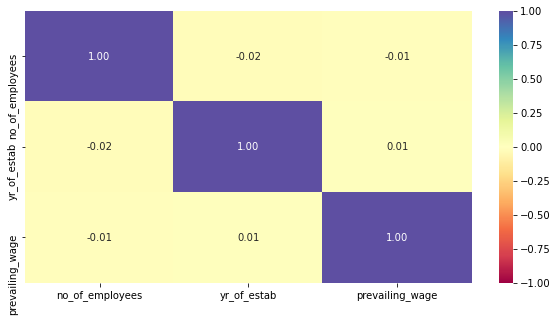

<IPython.core.display.Javascript object>

In [30]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There are no obvious correlations between the numerical variables

In [31]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [32]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


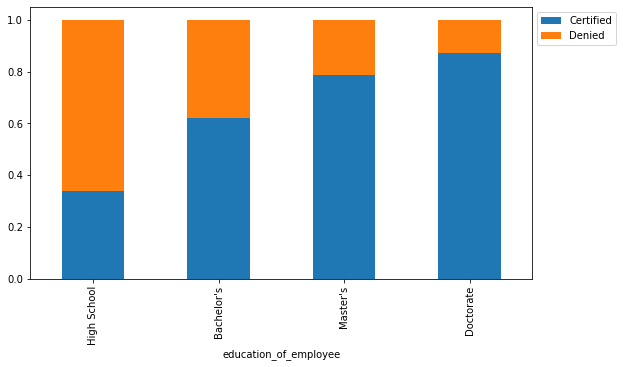

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(df, "education_of_employee", "case_status")

- We can see that the higher the education the more the cases that get certified for those employees

**Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further**

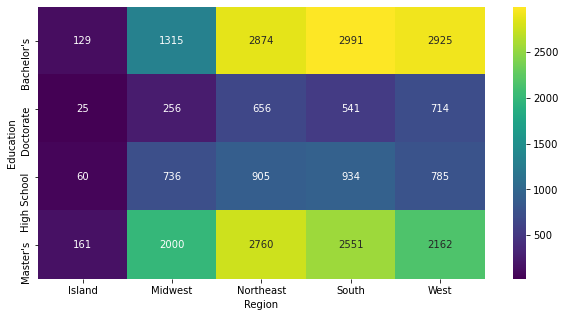

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(df["education_of_employee"], df["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)  ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

- Generally the split between employees who have Bachelors degree and Masters degree are close across the regions
- Employess who are from the west region however tend to have Doctorate degress compared to the other regions

**Let's have a look at the percentage of visa certifications across each region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


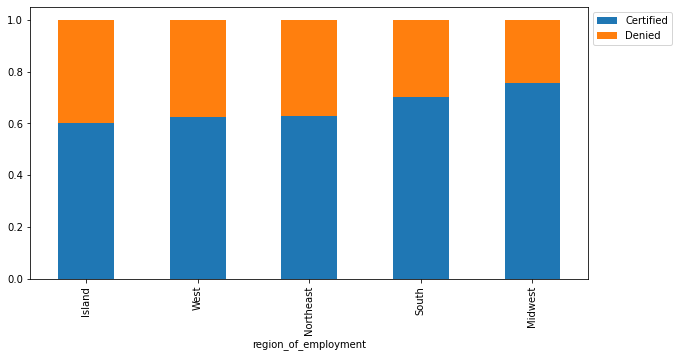

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(
    df, "region_of_employment", "case_status"
)  ## Complete the code to plot stacked barplot for region of employment and case status

- The region of employment almost has no impact on the status of the case, however employees in the South and Midwest seem to have a slightly higher chance of getting their cases certified than denied

**Lets' similarly check for the continents and find out how the visa status vary across different continents.**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


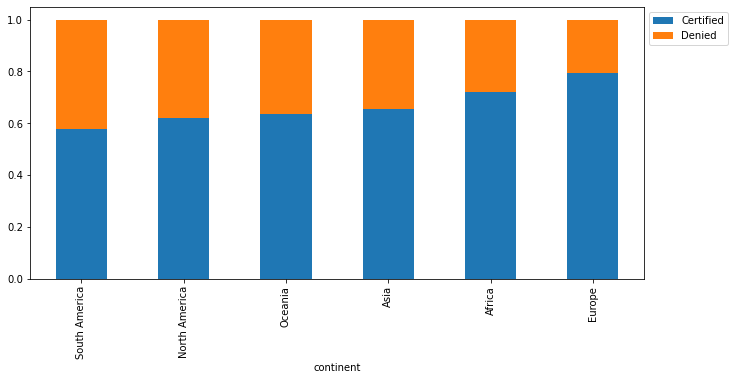

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(
    df, "continent", "case_status"
)  ## Complete the code to plot stacked barplot for continent and case status

- The continent seem to have no significant impact on the status of the case, however employees in Africa and Europe seem to have a slightly higher chance of getting their cases certified than denied

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification** 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


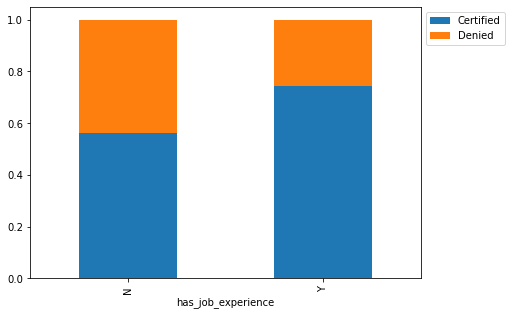

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(
    df, "has_job_experience", "case_status"
)  ## Complete the code to plot stacked barplot for job experience and case status

- We can see that employess with job experience seem to have a higher chance of getting their cases certifiend than denied

**Do the employees who have prior work experience require any job training?**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


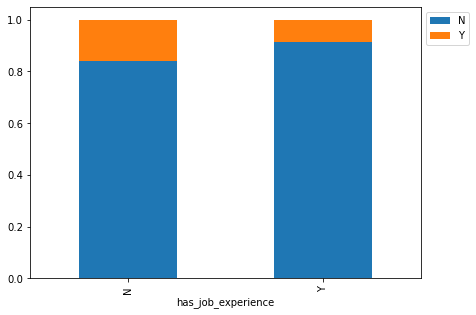

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(
    df, "has_job_experience", "requires_job_training"
)  ## Complete the code to plot stacked barplot for job experience and requires_job_training

- The plot shows that employees who have job experience do not require job training but the significance is not extremly high

**The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage**

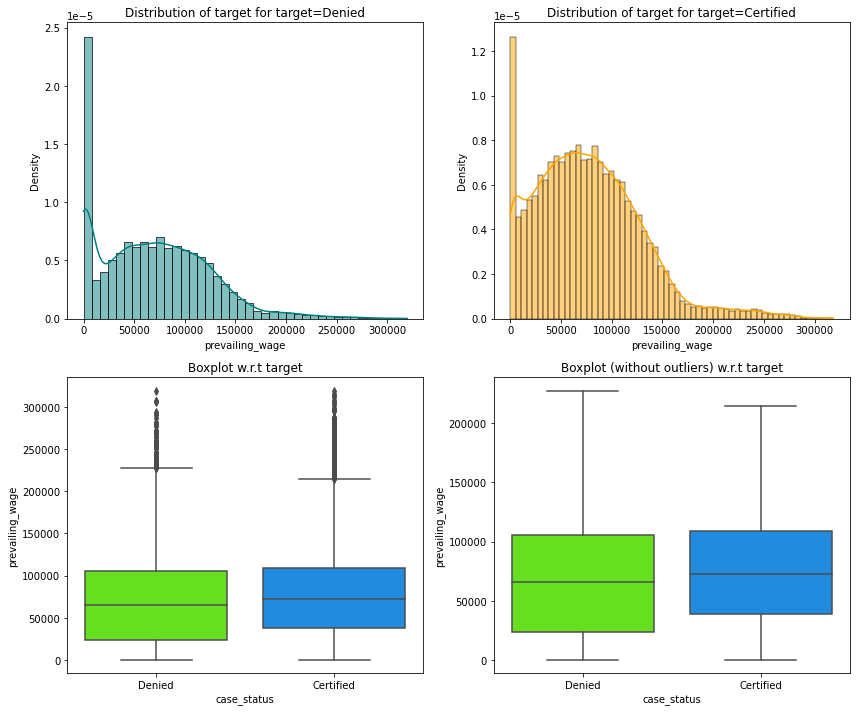

<IPython.core.display.Javascript object>

In [39]:
distribution_plot_wrt_target(
    df, "prevailing_wage", "case_status"
)  ## Complete the code to find distribution of prevailing wage and case status

- The prevailing wage does not seem to affect the case status as we see that employees with the highest pevailing wage were denied  

**Checking if the prevailing wage is similar across all the regions of the US**

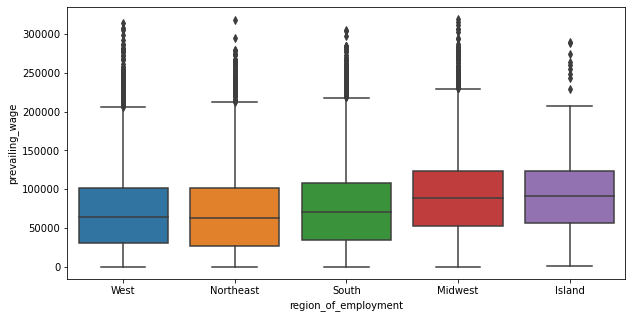

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="region_of_employment", y="prevailing_wage"
)  ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

- The previaling wage doesn't seem to vary much between regions, althogh the prevailing wages in Midwest and Island seem a little higher than the rest of the regions

**The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


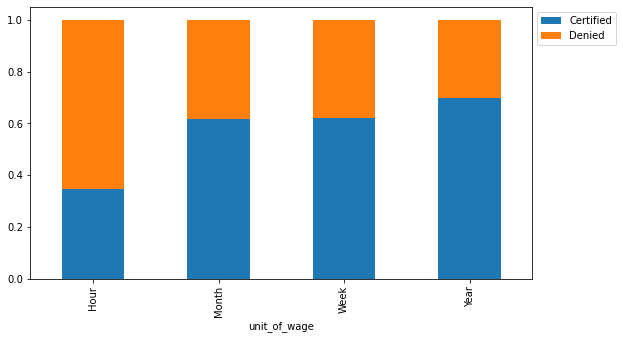

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(
    df, "unit_of_wage", "case_status"
)  ## Complete the code to plot stacked barplot for unit of wage and case status

- Hourly unit of wage seem to have the highest rate of denial, while the significane is equal for the rest of the units of wage

### Outlier Check

- Let's check for outliers in the data.

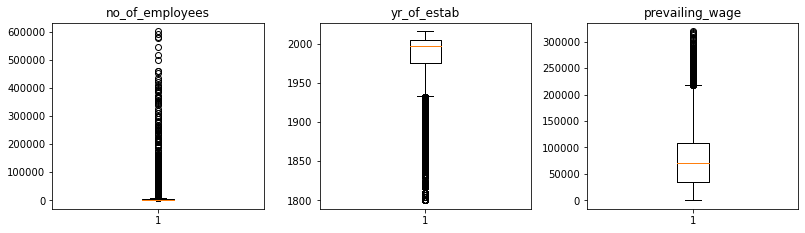

<IPython.core.display.Javascript object>

In [42]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Model Building - Approach
1. Data preparation
2. Split the data into the train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparameter tuning.
5. Test the performance on the test data.

## Split Data

In [43]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = df.drop(
    "case_status", axis=1
)  ## Complete the code to drop case status from the data
Y = df["case_status"]


X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)  ## Complete the code to split the data into train and test in the ratio 70:30

<IPython.core.display.Javascript object>

In [44]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

- The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [46]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building bagging and boosting models

### Decision Tree Model

In [47]:
d_tree = DecisionTreeClassifier(
    random_state=1
)  ## Complete the code to define decision tree classifier with random state = 1


d_tree.fit(
    X_train, y_train
)  ## Complete the code to fit decision tree classifier on the train data

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


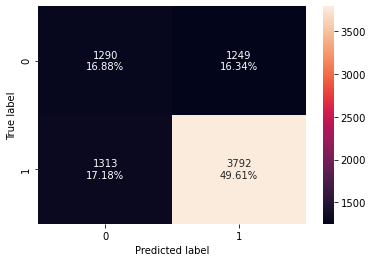

<IPython.core.display.Javascript object>

In [48]:
# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)


confusion_matrix_sklearn(
    d_tree, X_test, y_test
)  ## Complete the code to create confusion matrix for train data

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [49]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


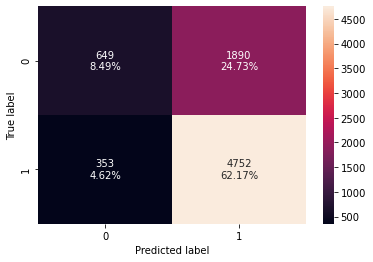

<IPython.core.display.Javascript object>

In [50]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The overfitting has not really reduced.
* Let's try some other models.

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


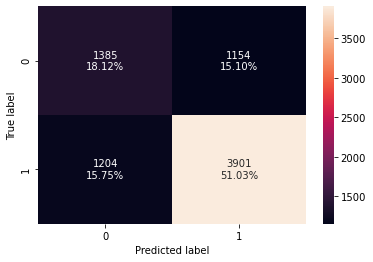

<IPython.core.display.Javascript object>

In [51]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging Classifier is giving a slightly higher test f1-score than decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Bagging Classifier

In [52]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


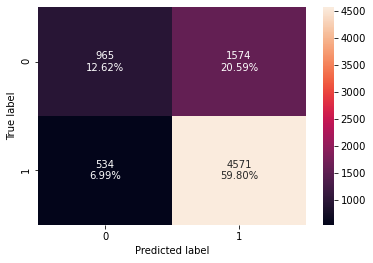

<IPython.core.display.Javascript object>

In [53]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)


* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score have increased.

### Random Forest

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


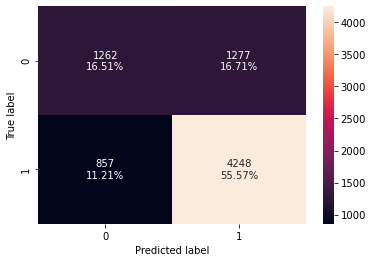

<IPython.core.display.Javascript object>

In [54]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is giving a slightly higher test f1-score than decision trees but it is overfitting the training data
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Random Forest

In [55]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


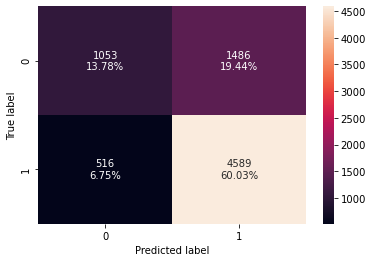

<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The model performance has improved even better than Bagging classfier
* The test recall and test f1-score have increased.

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


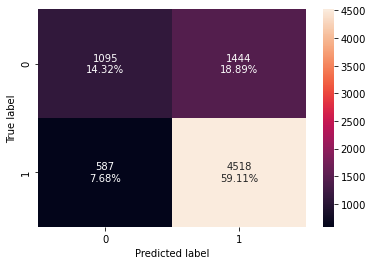

<IPython.core.display.Javascript object>

In [57]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance:\n", ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is still lower than tuned random forest
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - AdaBoost Classifier

In [58]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


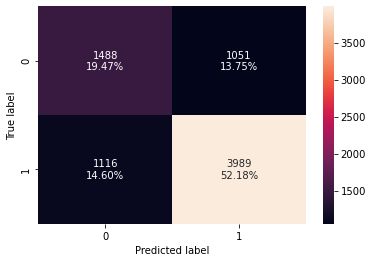

<IPython.core.display.Javascript object>

In [59]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance:\n", abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* Surprisingly, the model performance has decreased after hyperparameter tuning.
* Let's try other boosting models.

### Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


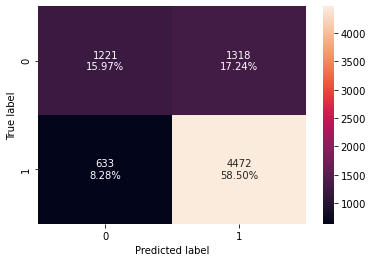

<IPython.core.display.Javascript object>

In [60]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* Gradient boosting is giving more generalized performance than previous models 
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [61]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


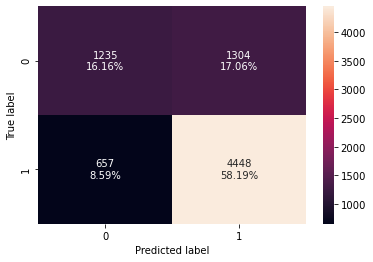

<IPython.core.display.Javascript object>

In [62]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* There is not much difference in the model performance after hyperparameter tuning.
* Let's now try XGBoost model.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


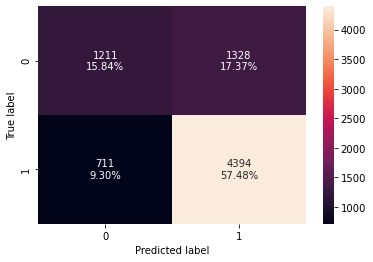

<IPython.core.display.Javascript object>

In [63]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* The performance of the XGBoost is close to that of Gradient boosting 
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - XGBoost Classifier

In [64]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy   Recall  Precision        F1
0  0.765867  0.88139   0.791676  0.834128
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745945  0.871694   0.775667  0.820882


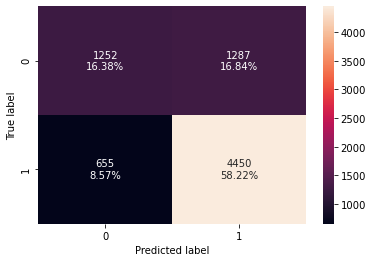

<IPython.core.display.Javascript object>

In [65]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

* There is not much difference in the model performance after hyperparameter tuning.

### Stacking Classifier

In [66]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=Tru...
                                                 

<IPython.core.display.Javascript object>

#### Checking model performance on training and testing sets

Training performance:
    Accuracy    Recall  Precision        F1
0  0.769231  0.891295   0.790089  0.837646
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744113  0.878942     0.7703  0.821043


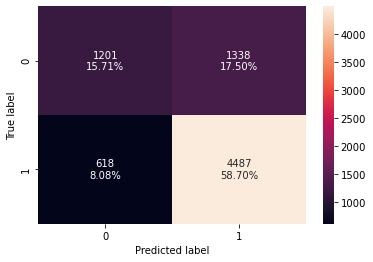

<IPython.core.display.Javascript object>

In [67]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost and Gradient Boost

## Model Performance Comparison and Conclusions

In [68]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.765867,0.769231
Recall,1.0,1.0,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.881390,0.891295
Precision,1.0,1.0,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.791676,0.790089
F1,1.0,1.0,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.834128,0.837646


<IPython.core.display.Javascript object>

In [69]:
# testing performance comparison


models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.664835,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.745945,0.744113
Recall,0.742801,0.742801,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.871694,0.878942
Precision,0.752232,0.752232,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.775667,0.770300
F1,0.747487,0.747487,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820882,0.821043


<IPython.core.display.Javascript object>

* The Decision Trees and the Bagging Classifiers are overfitting the training data.
* The Gradient Boost and the tuned XGBoost classifiers are giving the highest f1-scores on the test data and also giving a more generalized performance as compared to the other models. 
* Overall the Gradient Boost Classifier has a slightly higher score than the XGBoost and is therefore the best model

### Important features of the final model

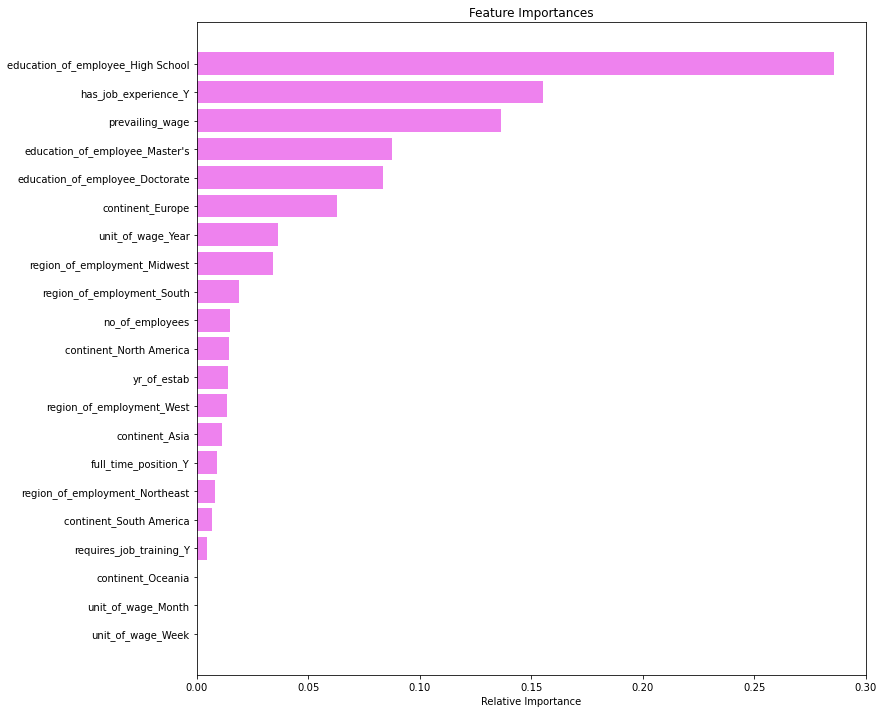

<IPython.core.display.Javascript object>

In [70]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The education of employee is the most important feature in determining whether the visa gets certified, followed by job experience and prevailing wage

## Actionable Insights and Recommendations

* Based on our analysis, we can say that the certified visas have the following features in comparison to the denied visa cases: 
    - Education of employee
    - Job exeperience 
    - Prevailing wage
    - Continent
    - Unit of wage
    - Region
* Candidates who are highly educated have more chances of visa certification
* Candidates with job experience who well paid and are paid annually should also be prioritized for shortlisting
* Also candidates from Europe are more likely to get visas vertified and should be moved up the shortlist